<a href="https://colab.research.google.com/github/dsnbkprasanth/MAO-B/blob/main/Basic_of_DFT_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My name is **Dr. Ashfaq Ahmad**, working in the field of structure biology and bioinformatics. The DFT notebook is designed for teaching and research purposes. If you want to use this pipeline for commercial purpose, please contact. Detailed video tutorial of this notebook can be found on [Bioinformatic Insights](https://youtu.be/qGqXS4aWgAg).

**Announcement**

If you need assistance in developing a pipeline for your research protocol in a paid capacity, feel free to reach out from the channel page or github. I’d be happy to help!

In [2]:
#@title Install necessary libraries
!pip install pyscf ase matplotlib numpy ipywidgets pubchempy rdkit reportlab

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.7 MB/s eta 0:00:00
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13818 sha256=ec68b71e569689d8c658a9c49d6f11420505c22a9640b6d9e731607907a54326
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


# Density Functional Theory (DFT) Analysis

Density Functional Theory (DFT) is a computational quantum mechanical modeling method used to investigate the electronic structure of many-body systems, especially atoms, molecules, and the condensed phases. DFT is among the most popular and versatile methods available in condensed-matter physics, computational physics, and computational chemistry.

## Basic Concepts of DFT

1. **Hohenberg-Kohn Theorems**:
   - The ground state properties of a many-electron system are uniquely determined by the electron density.
   - The electron density that minimizes the total energy is the true ground state electron density.

2. **Kohn-Sham Equations**:
   - The Kohn-Sham equations are a set of self-consistent equations that allow us to find the electron density of a system.

3. **Exchange-Correlation Functionals**:
   - The exchange-correlation functional accounts for the non-classical part of the electron-electron interaction.

In [3]:
#@title Now, let's set up a simple DFT calculation using _PySCF_
from pyscf import gto, dft

# Define a molecule (e.g., water)
mol = gto.Mole()
mol.atom = '''
C     0.69727     0.00296    -0.55402
N     1.35338    -0.11097    -1.79698
H     1.65288     0.67811    -2.38177
O     1.60934    -1.37740    -2.16341
C     1.06468    -2.08074    -1.11486
C     0.48264    -1.22613    -0.10551
C    -0.16458    -1.69527     1.09646
N    -0.68460    -2.06575     2.06184
C     0.40621     1.30848     0.07385
C     0.61852     2.49656    -0.64674
C     0.46175     3.73020    -0.03105
C     0.10878     3.81024     1.32671
C    -0.15106     2.61856     2.02554
C    -0.01211     1.38947     1.40273
N     0.04034     5.07730     1.98885
C     0.28683     6.30473     1.26145
C    -0.19346     5.15275     3.41570
N     1.11713    -3.50185    -1.04575
H     0.70130    -3.99763    -0.22748
H     1.58309    -3.99130    -1.83786
H     0.92338     2.49411    -1.68205
H     0.64729     4.62119    -0.61448
H    -0.44215     2.62622     3.06507
H    -0.19388     0.51392     1.98751
H     0.19832     7.18850     1.91978
H    -0.44819     6.40661     0.43937
H     1.31780     6.28511     0.85144
H    -0.21016     6.20159     3.76564
H     0.62932     4.62712     3.94477
H    -1.16573     4.68821     3.66567
'''
mol.charge = 0
mol.spin = 1  # doublet, since there are 121 electrons
mol.basis = 'sto-3g'
mol.unit = 'Angstrom'
mol.build()
mol.basis = 'sto-3g'
mol.build()

# Perform DFT calculation
mf = dft.RKS(mol)
mf.xc = 'b3lyp'  # Use B3LYP functional
mf.kernel()

# Print the total energy
print("Total Energy (B3LYP):", mf.e_tot)

/usr/local/lib/python3.11/dist-packages/pyscf/dft/libxc.py:512: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -749.549521402043
Total Energy (B3LYP): -749.5495214020434


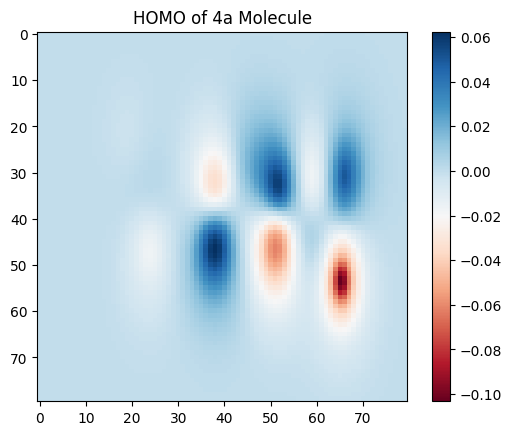

In [4]:
#@title Visualize the molecular orbitals using _PySCF_ and _matplotlib_
import matplotlib.pyplot as plt
import numpy as np

# Plot the HOMO (Highest Occupied Molecular Orbital)
homo_index = mol.nelectron // 2 - 1  # Index of the HOMO
homo = mf.mo_coeff[:, homo_index]

# Generate a grid for visualization
from pyscf import tools
tools.cubegen.orbital(mol, 'homo.cube', homo)

# Load and plot the cube file
from ase.io.cube import read_cube_data
data, atoms = read_cube_data('homo.cube')

# Plot the HOMO
plt.imshow(data[:, :, data.shape[2]//2], cmap='RdBu')
plt.colorbar()
plt.title('HOMO of 4a Molecule')
plt.show()

converged SCF energy = -749.058653082964
Total Energy (B3LYP): -749.058653 Hartree


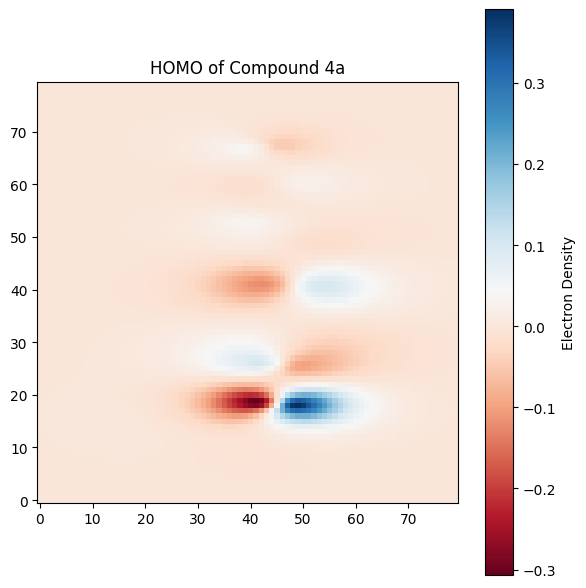

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from pyscf import gto, dft
from pyscf.tools import cubegen
import matplotlib.pyplot as plt
from ase.io.cube import read_cube_data
import os

# --- Step 1: Define the SMILES of your custom molecule (4a) ---
smiles = 'CN(C)c1ccc(cc1)c1noc(N)c1C#N'

# --- Step 2: Generate 3D structure using RDKit ---
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)  # Add hydrogens
AllChem.EmbedMolecule(mol)  # Generate 3D coordinates
AllChem.MMFFOptimizeMolecule(mol)  # Geometry optimization

# Extract atoms and 3D coordinates
conf = mol.GetConformer()
atoms = [mol.GetAtomWithIdx(i).GetSymbol() for i in range(mol.GetNumAtoms())]
coords = [conf.GetAtomPosition(i) for i in range(mol.GetNumAtoms())]

# --- Step 3: Build molecule in PySCF ---
mol_pyscf = gto.Mole()
mol_pyscf.atom = [[atom, (coord.x, coord.y, coord.z)] for atom, coord in zip(atoms, coords)]
mol_pyscf.unit = 'Angstrom'
mol_pyscf.basis = 'sto-3g'
mol_pyscf.charge = 0
mol_pyscf.spin = 0  # Singlet → even number of electrons (120)
mol_pyscf.build()

# --- Step 4: Perform DFT calculation using RKS (for singlet) ---
mf = dft.RKS(mol_pyscf)
mf.xc = 'b3lyp'
mf.kernel()

# --- Step 5: Display total energy ---
print(f"Total Energy (B3LYP): {mf.e_tot:.6f} Hartree")

# --- Step 6: Generate cube file for HOMO ---
homo_index = mol_pyscf.nelectron // 2 - 1
cubegen.orbital(mol_pyscf, 'homo.cube', mf.mo_coeff[:, homo_index])

# --- Step 7: Visualize HOMO orbital as 2D slice ---
homo_data, _ = read_cube_data('homo.cube')
plt.figure(figsize=(6, 6))
plt.imshow(homo_data[:, :, homo_data.shape[2] // 2], cmap='RdBu', origin='lower')
plt.colorbar(label='Electron Density')
plt.title('HOMO of Compound 4a')
plt.tight_layout()
plt.show()

# Optional: Clean up cube file
os.remove('homo.cube')

**Warning**: Below code generates a kind of prelimary resut report. However, this code is in testing phase, and I personally did not test it on different compounds, therefore, I strongly suggest to please consult an expert, in case you want to publish it.

In [7]:
import numpy as np

# Get the orbital energies (in Hartree)
orbital_energies = mf.mo_energy

# HOMO and LUMO indices for closed-shell
homo_index = mol_pyscf.nelectron // 2 - 1
lumo_index = homo_index + 1

# Convert Hartree to eV (1 Hartree = 27.2114 eV)
hartree_to_ev = 27.2114
homo_energy = orbital_energies[homo_index] * hartree_to_ev
lumo_energy = orbital_energies[lumo_index] * hartree_to_ev
gap = lumo_energy - homo_energy

# Print results
print(f"HOMO Energy: {homo_energy:.4f} eV")
print(f"LUMO Energy: {lumo_energy:.4f} eV")
print(f"HOMO-LUMO Gap: {gap:.4f} eV")


HOMO Energy: -3.2708 eV
LUMO Energy: 1.9181 eV
HOMO-LUMO Gap: 5.1889 eV


## Analysis and Discussion of Results

Let's discuss these results, such as the total energy, molecular orbitals, and electron density

- **Total Energy**: The total energy of the system is calculated using the B3LYP functional.
- **Molecular Orbitals**: The HOMO (Highest Occupied Molecular Orbital) is visualized, showing the electron density distribution.
- **Electron Density**: The electron density can be analyzed to understand the chemical bonding and reactivity of the molecule.

# Interpreting the HOMO (Highest Occupied Molecular Orbital) Figure

The **HOMO (Highest Occupied Molecular Orbital)** figure visualizes the electron density distribution in the highest energy orbital that is occupied by electrons in a molecule. This orbital is significant because it plays a key role in chemical reactions, particularly in processes like **electron donation** (e.g., in redox reactions) and **bond formation**.

---

## What Does the HOMO Represent?
- The HOMO represents the **most loosely bound electrons** in the molecule.
- These electrons are the most likely to participate in chemical reactions, such as forming bonds with other molecules or donating electrons.
- The shape and distribution of the HOMO provide insights into the **reactivity** and **electronic properties** of the molecule.

---

## Key Features to Look For in the HOMO Figure

### 1. **Electron Density Distribution**
- The **bright regions** (often colored red or blue in the plot) represent areas of high electron density.
- The **dim regions** (often white or transparent) represent areas of low or no electron density.
- The electron density is typically concentrated around **atoms** or **bonds** where the electrons are most likely to be found.

### 2. **Symmetry and Shape**
- The HOMO often reflects the **symmetry** of the molecule. For example, in a symmetric molecule like benzene, the HOMO will have a symmetric distribution of electron density.
- The shape of the HOMO can be **bonding**, **antibonding**, or **non-bonding**:
  - **Bonding orbitals**: Electron density is concentrated between atoms, indicating stabilizing interactions.
  - **Antibonding orbitals**: Electron density is concentrated outside the bond region, indicating destabilizing interactions.
  - **Non-bonding orbitals**: Electron density is localized on a single atom (e.g., lone pairs).

### 3. **Localization vs. Delocalization**
- If the electron density is **localized** on a specific atom or bond, it suggests that the HOMO is associated with a particular functional group or region of the molecule.
- If the electron density is **delocalized** over multiple atoms or bonds, it indicates that the electrons are shared across a larger region of the molecule (e.g., in conjugated systems like benzene or polyenes).

---

## Interpreting the HOMO for Chemical Reactivity
- **Nucleophilic Sites**: Regions with high electron density in the HOMO are potential sites for **nucleophilic attack** (donating electrons).
- **Electron Donation**: The HOMO is the orbital from which electrons are most easily donated in a reaction.
- **Reactivity Trends**: Molecules with **higher energy HOMOs** are generally more reactive because their electrons are less tightly bound.

---

## Example: HOMO of Water (H₂O)
Let’s take the example of water (H₂O), which we used in the DFT calculation earlier.

### **HOMO Characteristics for Water**:
- The HOMO of water is primarily localized on the **oxygen atom**, representing the **lone pairs** of electrons.
- The electron density is concentrated around the oxygen, with little to no density on the hydrogen atoms.
- This indicates that the oxygen atom is the most likely site for **electron donation** (e.g., in hydrogen bonding or nucleophilic reactions).

### **Visualization**:
- In the HOMO plot, you would see bright regions (high electron density) around the oxygen atom and dim regions around the hydrogens.

---

## Example: HOMO of Benzene (C₆H₆)
For a more complex molecule like benzene:

### **HOMO Characteristics for Benzene**:
- The HOMO of benzene is **delocalized** over the entire ring, reflecting the **π-electron system**.
- The electron density is evenly distributed above and below the plane of the ring.
- This delocalization indicates that benzene is highly stable and less reactive compared to molecules with localized HOMOs.

### **Visualization**:
- In the HOMO plot, you would see a symmetric, donut-shaped electron density distribution above and below the ring.

---

## How to Use the HOMO in Analysis
- **Predict Reactivity**: Identify regions of high electron density to predict where the molecule is likely to react.
- **Compare Molecules**: Compare HOMOs of different molecules to understand their relative reactivity or stability.
- **Understand Bonding**: Use the HOMO to analyze bonding patterns, such as conjugation or lone pairs.

---

## Limitations of the HOMO
- The HOMO only provides information about the **highest occupied orbital**. For a complete picture of reactivity, you should also consider the **LUMO (Lowest Unoccupied Molecular Orbital)**, which represents the lowest energy orbital that can accept electrons.
- The HOMO does not account for **dynamic effects** (e.g., solvent interactions or temperature), which can also influence reactivity.

---

## Summary
- The HOMO figure shows the distribution of the most loosely bound electrons in a molecule.
- High electron density regions indicate potential sites for reactivity (e.g., nucleophilic attack).
- The shape and symmetry of the HOMO reflect the molecule’s electronic structure and bonding.
- By analyzing the HOMO, you can gain insights into the molecule’s chemical behavior and reactivity.

## Conclusion

In this tutorial, we have introduced the basic concepts of Density Functional Theory (DFT) and demonstrated how to perform DFT calculations on a simple molecule using `PySCF`. We also visualized the molecular orbitals and analyzed the results.

## DFT Calculations for Vibrational Frequencies and Thermodynamics Properties

### Further Reading
- [PySCF Documentation](https://pyscf.org/)
- [Density Functional Theory: A Practical Introduction by David Sholl and Janice A. Steckel](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470447710)